# Load the data

In [2]:
# add code here
from sklearn.datasets import load_diabetes

data = load_diabetes()
X = data.data
y = data.target

# Split the data into training and test sets

In [3]:
# add code here
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)
x_train.shape, x_test.shape

((353, 10), (89, 10))

# Scale the data

In [4]:
# add code here
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Train and evaluate the SVM model

In [5]:
# add code here
from sklearn.svm import SVR

model = SVR(C=2.0, kernel="linear", epsilon=0.1)
model.fit(x_train, y_train)

SVR(C=2.0, kernel='linear')

In [6]:
y_pred = model.predict(x_test)
y_pred

array([255.49966581,  73.3703622 , 148.95271285,  94.00309144,
       207.95954495, 135.96803567, 110.38072071, 159.05454525,
       132.80074899, 193.73862881, 250.25933457, 200.71037151,
       162.0924671 , 134.29660396,  56.43073658, 207.74126536,
       166.98604782,  63.250542  , 163.67638981, 167.83127138,
        94.32735261,  74.48549768, 272.99306526, 149.76964774,
       198.87170066, 149.65165832, 155.17478613, 115.74576654,
        78.57344064,  86.48495194, 187.69647686, 153.36135337,
       190.60987191, 114.73936286,  87.7316029 , 204.12315767,
        91.95922348, 208.82155025, 168.73057492, 142.57284361,
       232.60714865, 209.34138133, 121.03363377,  90.88483077,
       161.01423354, 104.85538521, 200.70195558,  81.09118827,
       238.24087956, 275.1975943 ,  88.35226219, 118.39107295,
       197.32936224, 161.73987058, 163.15701152, 135.00104381,
       125.33848314, 212.05237771, 211.84499515, 188.93203272,
       270.21638618, 117.7366788 , 171.2644058 ,  76.30

In [7]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mean_squared_error(y_test, y_pred), mean_absolute_error(y_test, y_pred)

(3203.522180051597, 46.25275359949131)

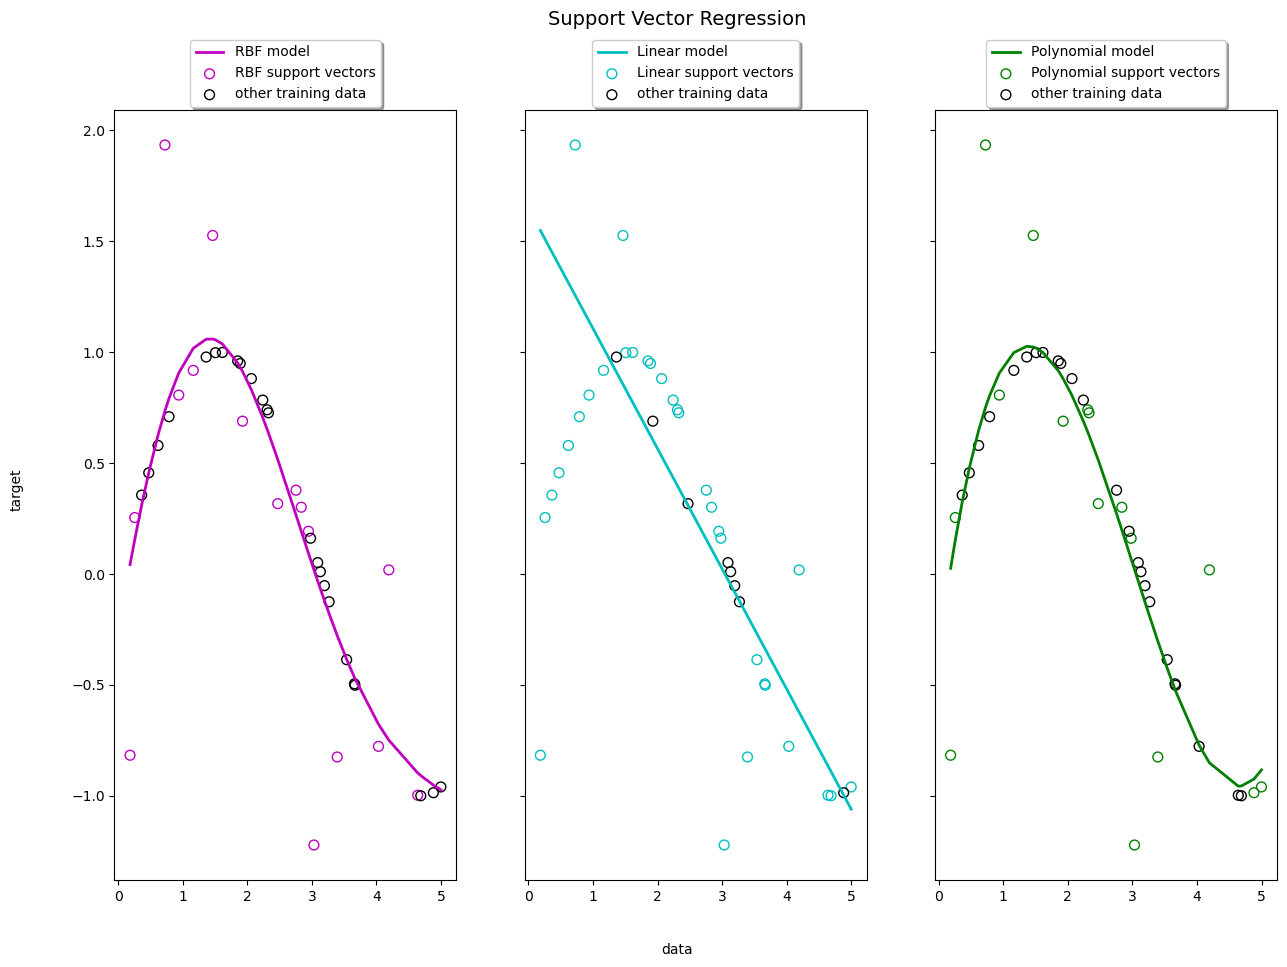

In [8]:
## Support Vector Regression (SVR) using linear and non-linear kernels
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVR

# Generate sample data
X = np.sort(5 * np.random.rand(40, 1), axis=0)
y = np.sin(X).ravel()

# add noise to targets
y[::5] += 3 * (0.5 - np.random.rand(8))

# Fit regression model
svr_rbf = SVR(kernel="rbf", C=100, gamma=0.1, epsilon=0.1)
svr_lin = SVR(kernel="linear", C=100, gamma="auto")
svr_poly = SVR(kernel="poly", C=100, gamma="auto", degree=3, epsilon=0.1, coef0=1)

# Look at the results
lw = 2

svrs = [svr_rbf, svr_lin, svr_poly]
kernel_label = ["RBF", "Linear", "Polynomial"]
model_color = ["m", "c", "g"]

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 10), sharey=True)
for ix, svr in enumerate(svrs):
    axes[ix].plot(
        X,
        svr.fit(X, y).predict(X),
        color=model_color[ix],
        lw=lw,
        label="{} model".format(kernel_label[ix]),
    )
    axes[ix].scatter(
        X[svr.support_],
        y[svr.support_],
        facecolor="none",
        edgecolor=model_color[ix],
        s=50,
        label="{} support vectors".format(kernel_label[ix]),
    )
    axes[ix].scatter(
        X[np.setdiff1d(np.arange(len(X)), svr.support_)],
        y[np.setdiff1d(np.arange(len(X)), svr.support_)],
        facecolor="none",
        edgecolor="k",
        s=50,
        label="other training data",
    )
    axes[ix].legend(
        loc="upper center",
        bbox_to_anchor=(0.5, 1.1),
        ncol=1,
        fancybox=True,
        shadow=True,
    )

fig.text(0.5, 0.04, "data", ha="center", va="center")
fig.text(0.06, 0.5, "target", ha="center", va="center", rotation="vertical")
fig.suptitle("Support Vector Regression", fontsize=14)
plt.show()